## Importación de las librerías

In [1]:
import utils
import pickle
import math
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## Conjuntos de entrenamiento y test y CV controller

In [2]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [3]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Búsqueda del mejor modelo de regresión logística

In [9]:
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,0.5,1,10,100],
    'solver': ['liblinear', 'saga']
}

grid_search_cv = GridSearchCV(LogisticRegression(random_state=99),
                              param_grid=param_grid, scoring='roc_auc', cv= cv, verbose=2)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, sol

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=LogisticRegression(random_state=99),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=2)

**Modelo de regresión logística**

In [10]:
print("best_model:", grid_search_cv.best_estimator_)
print("roc_auc:", grid_search_cv.best_score_)

best_model: LogisticRegression(C=0.5, random_state=99, solver='saga')
roc_auc: 0.8962189649817276


In [11]:
log_reg_model = LogisticRegression(C=0.5, random_state=99, solver='saga')

log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
cm = utils.get_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.13      0.72      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.76      0.83      1022



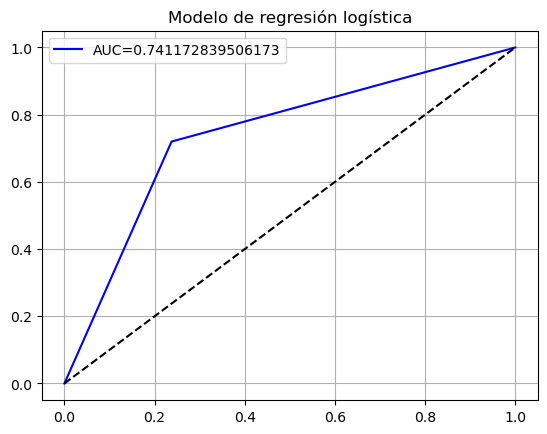

In [12]:
utils.print_metrics(y_test, y_pred, "Modelo de regresión logística")

Confusion matrix, without normalization
[[741 231]
 [ 14  36]]


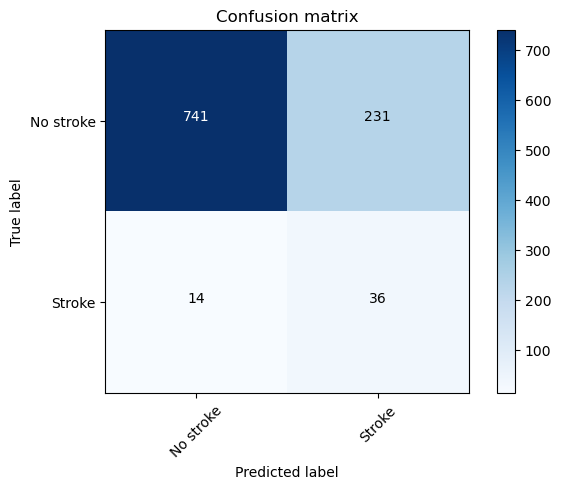

In [13]:
utils.plot_confusion_matrix(cm=cm, classes=['No stroke', 'Stroke'])

## Importancia de las variables

In [14]:
feature_importance = pd.DataFrame(list(log_reg_model.feature_names_in_), columns = ["feature"])
feature_importance["importance"] = pow(math.e, log_reg_model.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
feature_importance.head()

,feature,importance
0,age,6379.567875
4,avg_glucose_level,4.198752
1,hypertension,1.806075
6,work_type_Private,1.564458
2,heart_disease,1.322949


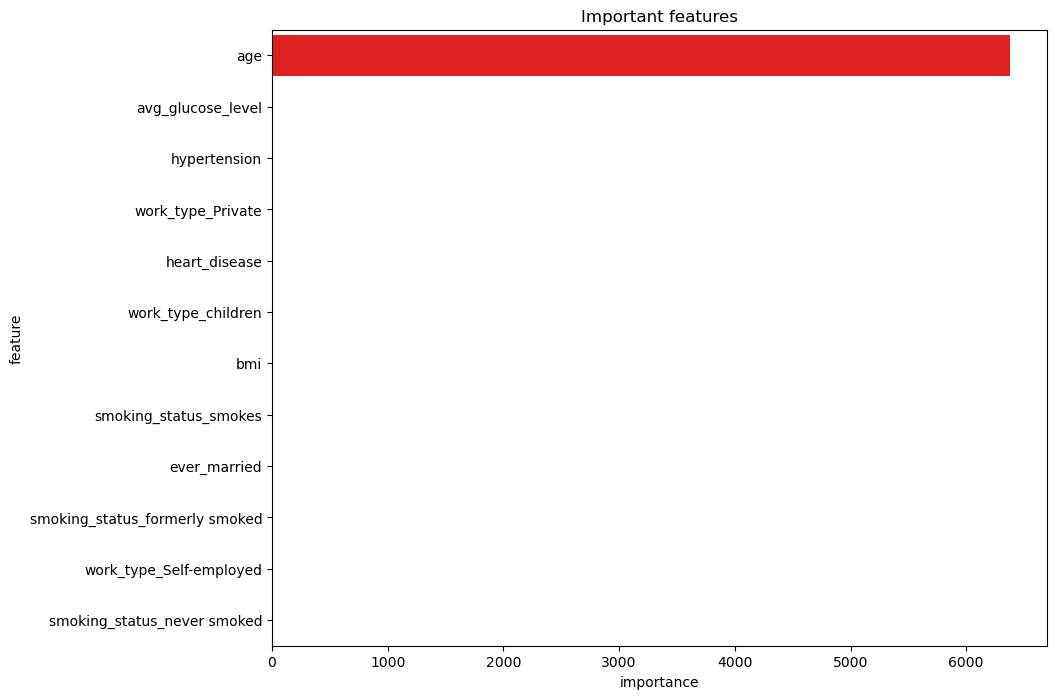

In [15]:
utils.plot_tree_feature_importance(feature_importance.feature, feature_importance.importance)

**Guardamos el modelo para la comparativa final**

In [16]:
pickle.dump(log_reg_model, open("logistic_regression_model.sav", 'wb'))